In [ ]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Estocasticos/

/content/gdrive/My Drive/Estocasticos


In [ ]:
!ls /content/gdrive/My\ Drive/Estocasticos/*

Dataset_Clases_Original/Perro11/Perro11.3.jpeg
Perro11
Perro11.3.jpeg
Resultado 1228800
Dataset_noencontradas/Perro11/Perro11.3.jpeg
Dataset_Clases_Original/Perro11/Perro11.2.jpeg
Perro11
Perro11.2.jpeg
Resultado 608400
Detection 0: Left: 109 Top: 327 Right: 354 Bottom: 571 Confidence: 1.049149990081787
Dataset_Clases_Original/Perro11/Perro11.1.jpeg
Perro11
Perro11.1.jpeg
Resultado 12192768
Dataset_noencontradas/Perro11/Perro11.1.jpeg
Dataset_Clases_Original/Perro13/Perro13.3.jpeg
Perro13
Perro13.3.jpeg
Resultado 599592
Detection 0: Left: 13 Top: 229 Right: 306 Bottom: 522 Confidence: 0.42340540885925293
Dataset_Clases_Original/Perro13/Perro13.1.jpeg
Perro13
Perro13.1.jpeg
Resultado 599592
Detection 0: Left: 102 Top: 229 Right: 396 Bottom: 522 Confidence: 1.0270099639892578
Dataset_Clases_Original/Perro13/Perro13.2.jpeg
Perro13
Perro13.2.jpeg
Resultado 811200
Detection 0: Left: 57 Top: 111 Right: 479 Bottom: 533 Confidence: 1.0070979595184326
Dataset_Clases_Original/Perro12/Perro12.2.j

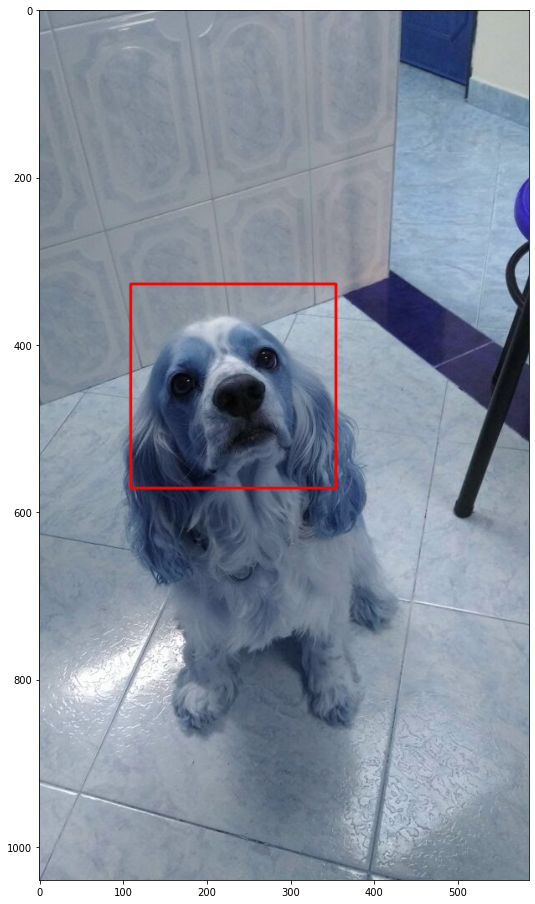

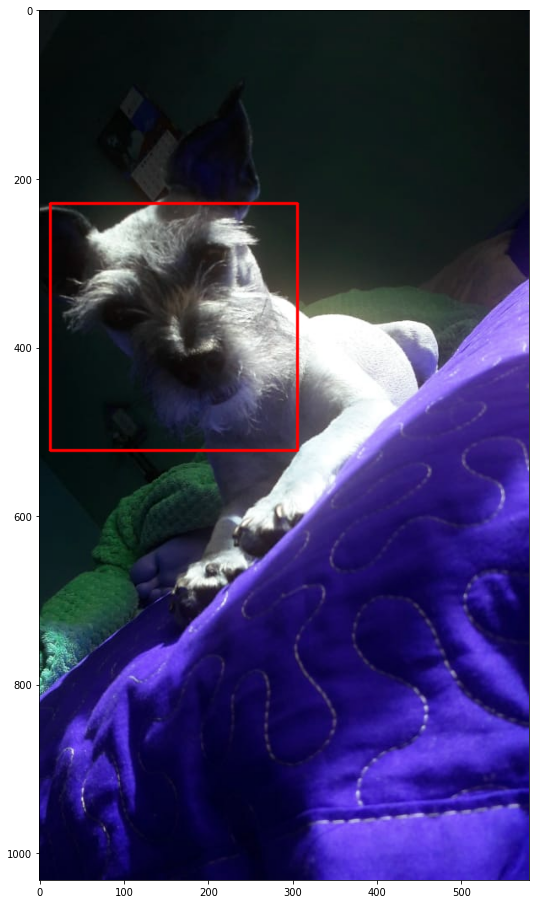

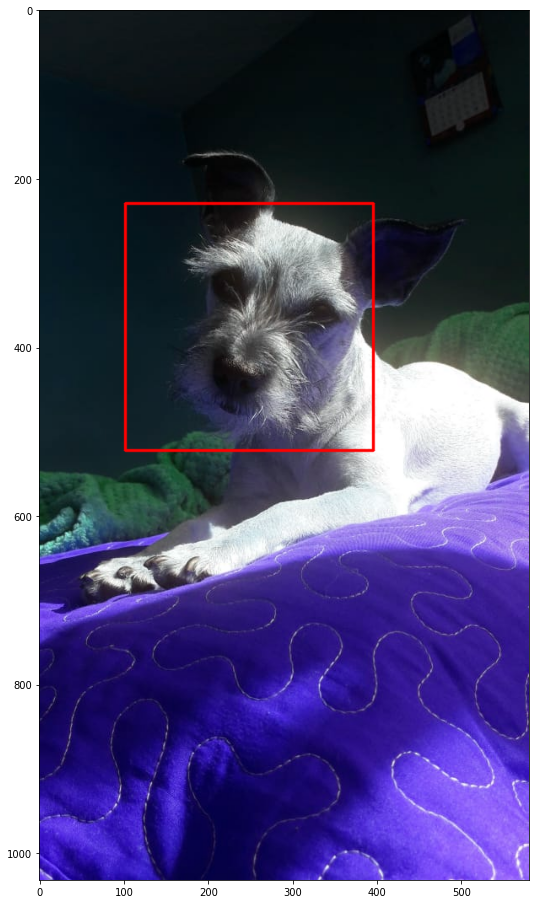

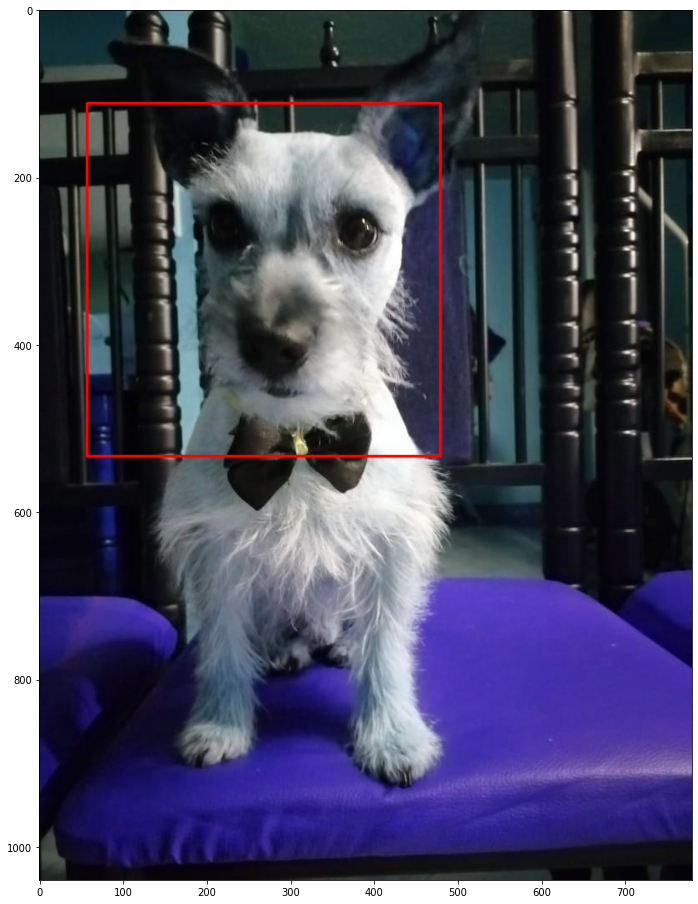

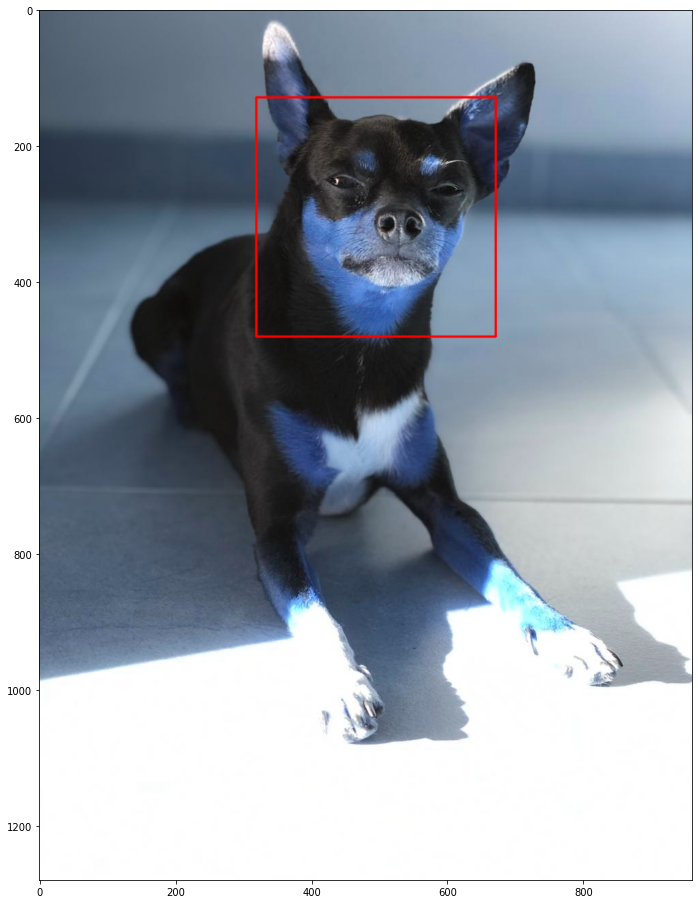

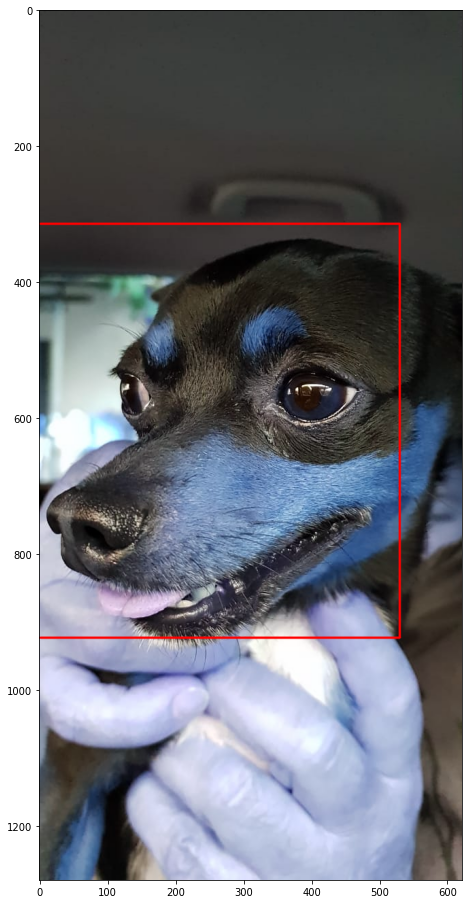

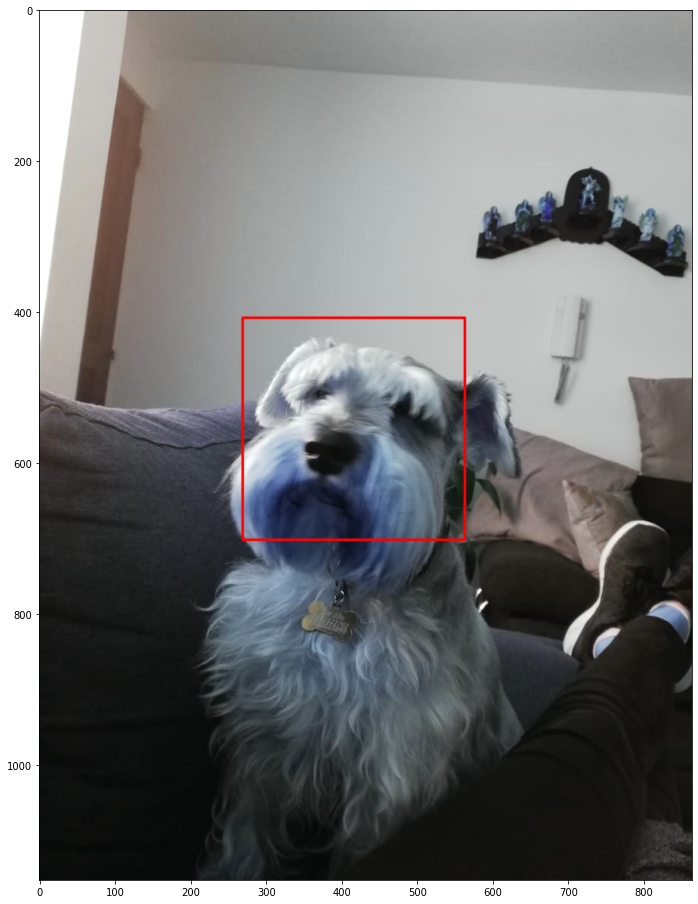

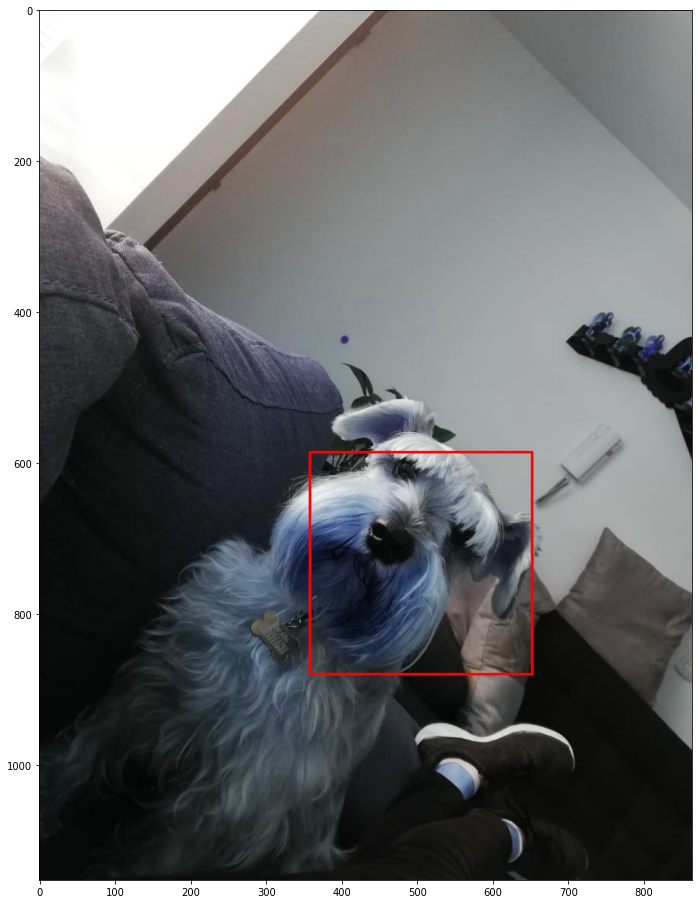

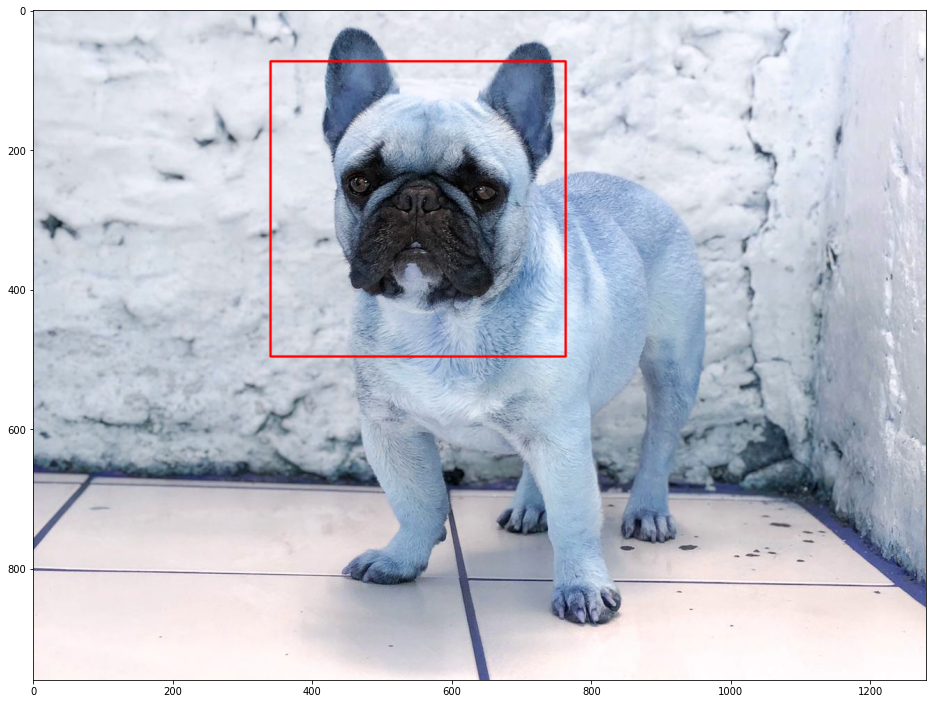

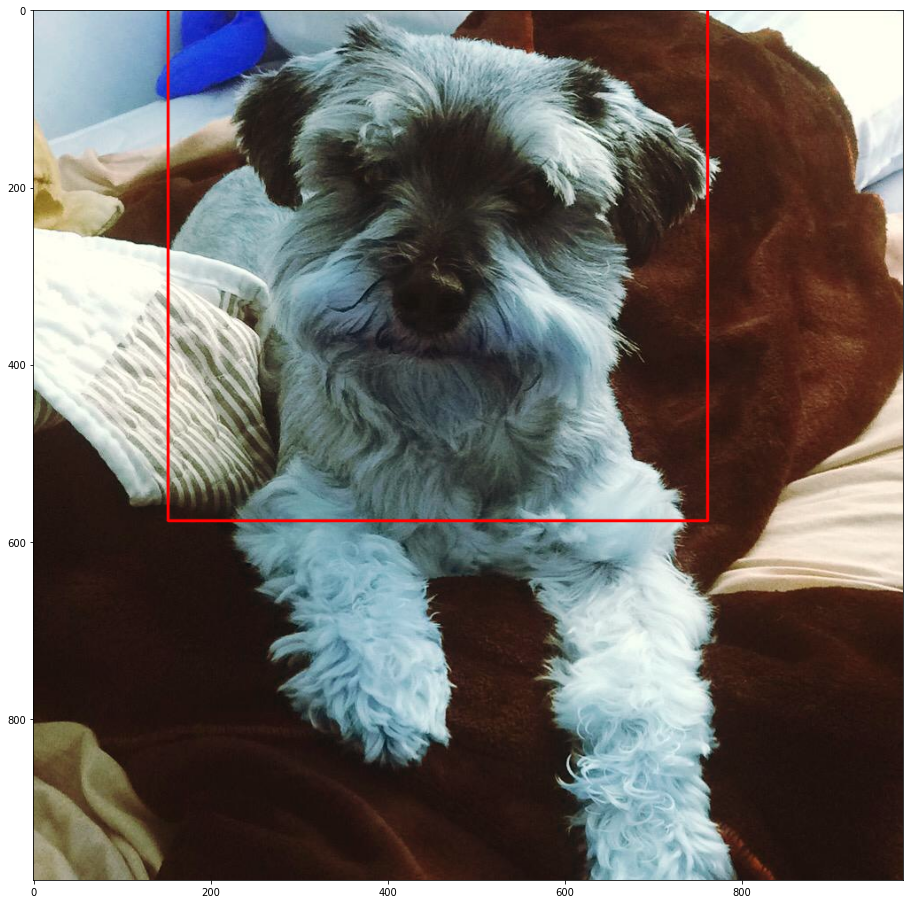

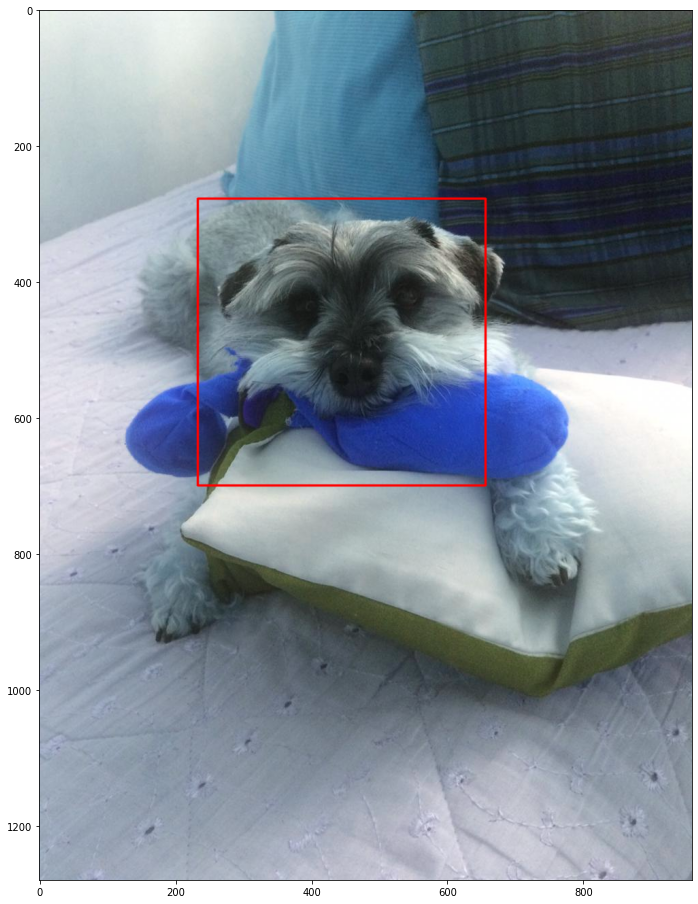

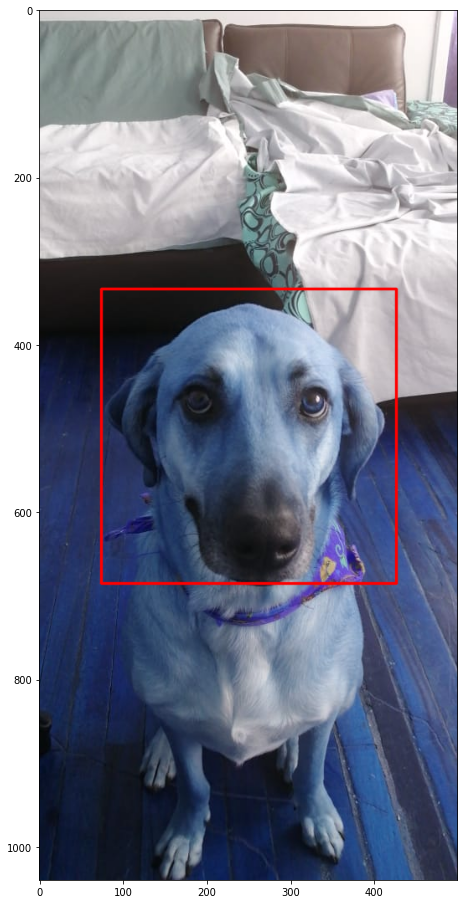

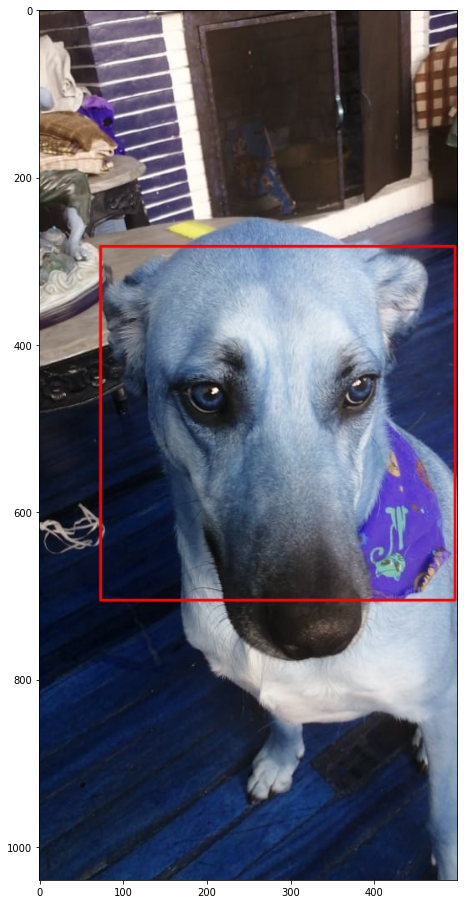

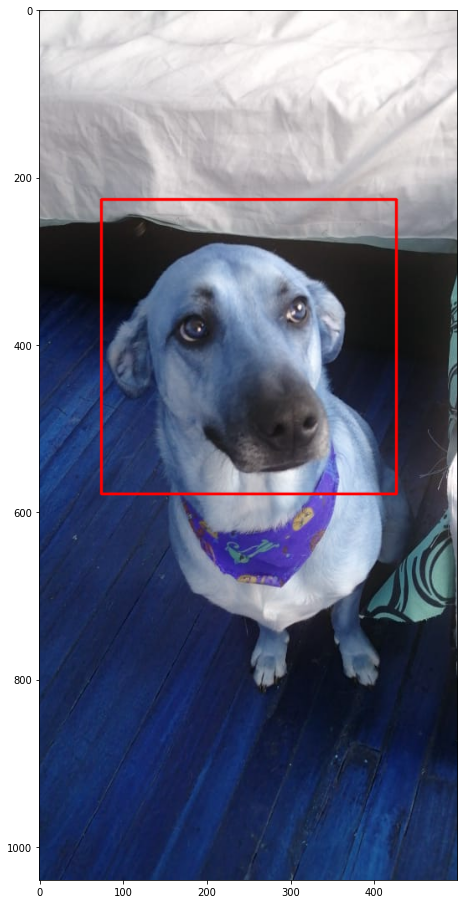

In [ ]:
path = 'Dataset_Clases_Original' #1
path_cuadros='Dataset_Cuadros' #2
path_noencontradas='Dataset_noencontradas' #3
path_redicortadas='Dataset_Cortadas_Redimensionadas' #4


#For que recorre las carpetas(sujetos) del path
for aa in os.listdir(path):
    
    #For que recorre la imagen de cada carpeta(sujeto)
    for f in os.listdir(path + '/' + aa):

      #i Carpeta del sujeto 
      #f Nombre de la imagen del sujeto
      #Ruta de la imagen
      imgPath = path + '/' + aa + '/' + f
      print(imgPath)
      print(aa)
      print(f)
    
      #Abrir Imagen (Lee la imagen en formtado BGR)
      imgBGR = cv2.imread(imgPath)

      height, width, channels = imgBGR.shape
      #print("|---Imagen de entrada----|")
      #print ("Alto: ",height," Ancho: ", width,"Canales: ", channels)
      print ("Resultado", height*width)
      
      total=(height*width)           
      #Cambiar el tamaño resize
      if(total>=1310720):
        height = 700
        width = 700
        dim = (width, height)
        imgBGR = cv2.resize(imgBGR, dim, interpolation=cv2.INTER_LINEAR)

      

      #Convierte la imagen en RGB
      imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

      

      #Copiar imagen del formato RGB para luego convertirla en GRAY
      imgcopyBGR_cortar = np.copy(imgBGR)

      imgcopyBGR_cuadros = np.copy(imgBGR)

      #Nombre y extension
      filename, ext = os.path.splitext(os.path.basename(imgPath))

      #Copiar imagen del formato RGB para luego convertirla en GRAY
      imgcopyRGB = np.copy(imgRGB)
      # Se convierte a escala de grises 
      imgGRAY = cv2.cvtColor(imgcopyRGB, cv2.COLOR_RGB2GRAY)

      
      #--------------------------------------------------------------
      #Detector de Cara
      detector = dlib.cnn_face_detection_model_v1('Modelo_Detector/dogHeadDetector.dat')
      dets = detector(imgGRAY, upsample_num_times=1)

      #print("Cantidad de caras encontradas en la Imagen->",len(dets))

      if (len(dets)==0):
          #print ("Error: No se detectaron caras en la imagen: ", imgi)
          #Guarda imagenes imagenes con cuadros
          os.makedirs(path_noencontradas+ '/'+aa, exist_ok=True)
          filename=(path_noencontradas+ '/' + aa + '/' + f) 
          print(filename)
          cv2.imwrite(filename, imgBGR) 
      else:

        #Recorre el número de caras encontradas
        for i, d in enumerate(dets):

            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

            x, y = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()
            #alto
            h=x2-x
            #ancho
            w=y2-y
            # representa la esquina superior izquierda del rectángulo PT1
            # representa la esquina inferior izquierda del rectángulo PT2
            # Color (255,0,0) en RGB
            # Grosor de línea thickness
            # Se usa el método cv2.rectangle () para dibujar un rectángulo
            cv2.rectangle(imgcopyBGR_cuadros, pt1=(x, y), pt2=(x2, y2), thickness=2, color=(255, 0, 0), lineType=cv2.LINE_AA)

            #Se valida si las coordenadas son negativas para dejar en cero por defecto
            if y<0:
                y=0
            if x<0:
                x=0
            if h<0:
                h=0
            if w<0:
                w=0

            #Corta y guarda imagenes
            os.makedirs(path_redicortadas+ '/'+aa, exist_ok=True)# Crear la carpeta si no esta creada 
            filename=(path_redicortadas+ '/' + aa + '/' + f) 
            #Ejemplo: image[y:y+h, x:x+w]
            cropped_image=imgcopyBGR_cortar[y:(y+h), x:(x+w)]
            #Cambiar el tamaño resize
            height = 180
            width = 180
            dim = (width, height)
            cropped_image = cv2.resize(cropped_image, dim, interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(filename, cropped_image) 
        #--------------------------------------------------------------

        
        #Guarda imagenes imagenes con cuadros
        os.makedirs(path_cuadros+ '/'+aa, exist_ok=True)
        filename=(path_cuadros+ '/' + aa + '/' + f) 
        cv2.imwrite(filename, imgcopyBGR_cuadros) 

        plt.figure(figsize=(16, 16))
        plt.imshow(imgcopyBGR_cuadros)